# TP01c - Arthur Carlos de Faria - 0040421

Agora vamos implementar alguns sistemas lineares (SLITs) de tempo contínuo.

**Instruções:**
- Use a versão Python 3.x
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.

**Objetivos**
- Implementar e simular sistemas de tempo contínuo
- Analisar sinais de entrada e saída de um sistema no domínio da frequência

## O Jupyter notebook

Coloque o seu código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

## Implementando sistemas

Vimos que um sistema linear invariante no tempo (SLIT) pode ser representado de diferentes maneiras:
- Diagrama esquemático (circuito)
- Equação diferencial
- Função de transferência
- Resposta ao impulso do sistema
- Resposta em frequência

### Circuito RC
Considere o sistema abaixo representado por seu ***diagrama esquemático***, em que $v_\mathrm{in}$ representa o sinal de entrada e $v_\mathrm{out}$ o sinal de saída.

![circuito_RC](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/1st_Order_Lowpass_Filter_RC.svg/250px-1st_Order_Lowpass_Filter_RC.svg.png)

A partir do diagrama, e usando as relações 
$$ v=Ri, \:\:\: i=C\frac{dv}{dt}, $$
é possível escrever:
$$ v_\mathrm{out}(t) = v_\mathrm{in}(t)-RC \frac{d v_\mathrm{out}}{dt}. $$

Considerando $x(t)\equiv v_\mathrm{in}(t)$ e $y(t)\equiv v_\mathrm{out}(t)$, tem-se a ***equação diferencial*** do sistema representada por:

$$ \label{eq:edo} \tag{1} y(t) + RC \dot{y}(t) - x(t) = 0 .$$

Transformando cada termpo da equação equação acima para o domínio de Laplace, tem se:

$$ \label{eq:lap} \tag{2}  Y(s) + RC s Y(s) - X(s) = 0, $$

em que é possível obter a ***função de transferência*** do sistema:

$$ \label{eq:tf} \tag{3} H(s) = \frac{Y(s)}{X(s)} = \frac{1}{RC s + 1} .$$

Fazendo a transformada inversa de Laplace de $\eqref{eq:tf}$, é possível obter a ***resposta ao impulso***:

$$ \label{eq:ht} \tag{4} h(t) = \frac{1}{RC} e^{- \left(\frac{1}{RC}\right) t} .$$

Por fim, é possível ainda obter a ***resposta em frequência*** do sistema fazendo $H(j\omega)=H(s)|_{s=j\omega}$

$$ H(j\omega) = \frac{1}{RC j\omega + 1} .$$

Na programação, Utilizaremos a forma de *função de transferência* $\eqref{eq:tf}$ para implementar no pacote SciPy. Para isso, define-se as variáveis `num` e `den` com os coeficientes do polinômio em $s$ do numerador e do denominador da função de transferência. Por exemplo, para $G(s)=\frac{3 s^2 - 2 s +5}{7 s - 1}$, fazemos:

```num = [3, -2, 5]
den = [7, -1]
sys = signal.lti(num, den)```

Em que `sys` é um objeto que contém todas as informações sobre o sistema $G(s)=\frac{3 s^2 - 2 s +5}{7 s - 1}$. Mais informações [nesse link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lti.html?highlight=lti#scipy.signal.lti).

Implemente no código abaixo a função de transferêcia do circuito RC $\eqref{eq:tf}$.

In [1]:
# Importa bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft
%matplotlib inline
# %matplotlib widget

# parâmetros
R = 100
C = 47e-3

### SEU CÓDIGO COMEÇA AQUI ### (≈ 2 linhas de código)
num = [1]
den = [R*C,1]
sys = signal.lti(num,den)
print(sys)
### FIM DO CÓDIGO ###


TransferFunctionContinuous(
array([0.21276596]),
array([1.        , 0.21276596]),
dt: None
)


**Saída esperada**: informações sobre o objeto `sys`.
```
TransferFunctionContinuous(
array([0.21276596]),
array([1.        , 0.21276596]),
dt: None
)
```
___

### Analisando o sistema implementado

Para um sistema de tempo contínuo você pode usar as funções abaixo.
- `signal.impulse(sys)`: resposta ao impulso do sistema
- `signal.step(sys)`: resposta ao degrau do sistema
- `signal.freqresp(sys)`: resposta em frequência
- `signal.bode(sys)`: diagrama de Bode

**Lembre-se**: você pode consultar ajuda para essas funções na [página do scipy.signal nesse link](https://docs.scipy.org/doc/scipy/reference/signal.html); digitar `?<nome_da_função>` para ver uma ajuda rápida da função; ou ainda posicionar o cursor na chamada da função e apertar `Shift+Tab` do seu teclado.

Na célula abaixo, faça três gráficos:
1. Resposta ao impulso do sistema
1. Resposta em frequência do sinal
1. Resposta do sistema a um degrau de amplitude igual a cinco, ou seja, com entrada: $x(t)=5 u(t)$

**LEIA ISTO**: Use o mesmo sistema já definido, não precisa definir o sistema novamente. TODO gráfico precisa ter rótulo nos eixos. As figuras devem ter tamanho `(8,2)`, use o comando `plt.figure(figsize=(8,2))`!


Resposta ao impulso


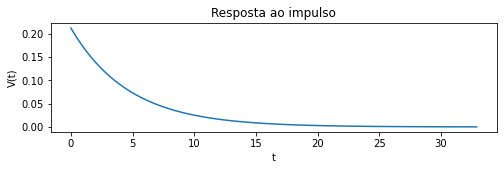

Resposta em frequência


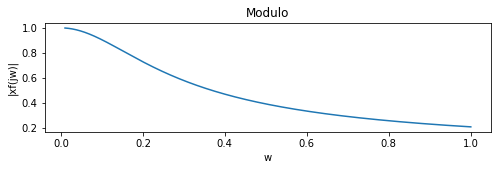

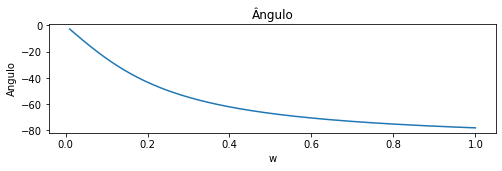

Resposta ao degrau 5u(t)


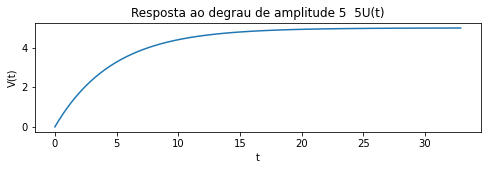

In [2]:
### SEU CÓDIGO COMEÇA AQUI ###
import numpy as np
t,y=signal.impulse(sys)#Resposta ao impulso

print("Resposta ao impulso")
plt.figure(figsize=(8,2))
plt.title("Resposta ao impulso")
plt.ylabel("V(t)")
plt.xlabel("t")
plt.plot(t,y)
plt.show()

print("Resposta em frequência")
w,xf=signal.freqresp(sys)#Resposta em frequencia
plt.figure(figsize=(8,2))
plt.title("Modulo")
plt.ylabel("|xf(jw)|")
plt.xlabel("w")
plt.plot(w,np.abs(xf))
plt.show()
plt.figure(figsize=(8,2))
plt.title("Ângulo")
plt.ylabel("Angulo")
plt.xlabel("w")
plt.plot(w,np.angle(xf, deg=True))
plt.show()

t,yu=signal.step(sys)# resposta ao degrau do sistema
y=5*yu               # resposta
print("Resposta ao degrau 5u(t)")
plt.figure(figsize=(8,2))
plt.title("Resposta ao degrau de amplitude 5  5U(t)")
plt.ylabel("V(t)")
plt.xlabel("t")
plt.plot(t,y)
plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**:
três gráficos: (1) resposta ao impulso, (2) resposta em frequência e (3) resposta ao degrau com amplitude 5.

## Implementação de outro sistema

Agora você irá implementar um sistema linear. Seus conhecimentos em análise de circuitos serão importantes nessa etapa. Mas, antes, escreva seu RA na variável `RA` abaixo e veja qual dos circuitos (1, 2, 3 ou 4) você implementará.

In [5]:
### SEU CÓDIGO COMEÇA AQUI ### (1 linha)
RA = 40421
### FIM DO CÓDIGO ###
print("ATENÇÃO: você deve implementar o circuito %d."%(RA%4+1))

ATENÇÃO: você deve implementar o circuito 2.


# Conforme a saída da célula anterior, para o circuito escolhido, faça:
1. Obtenha a equação diferencial do sistema, explicitando entrada e saída (a saída é sempre a tensão em $R_L$)
2. Obtenha a função de transferência do sistema no domínio de Laplace
3. Implemente a função de transferência (escolha os valores dos parâmetros como quiser)
4. Mostre os seguintes gráficos
   - Resposta em frequência do sistema (Diagrama de Bode)
   - Resposta ao degrau do sistema

| Sistema 1  | Sistema 2 |
| :---:         |     :---:      |
|![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/RLC_low-pass.svg/320px-RLC_low-pass.svg.png)| ![](https://upload.wikimedia.org/wikipedia/en/thumb/c/ce/RLC_high-pass.svg/320px-RLC_high-pass.svg.png)|
|       | |
| **Sistema 3** | **Sistema 4** |
|![](https://upload.wikimedia.org/wikipedia/en/thumb/1/14/RLC_series_band-pass.svg/320px-RLC_series_band-pass.svg.png)|![](https://upload.wikimedia.org/wikipedia/en/thumb/3/3f/RLC_series_band-stop.svg/320px-RLC_series_band-stop.svg.png)|


**Equação diferencial:

$$ \frac{y(t)}{(LC)} +\frac{\dot y(t)}{RC} +\ddot y(t) -\ddot x(t)=0 $$

**Função de Transferência:

$$ H(s) = \frac{ 1 s^2  }{s^2 +\frac{s}{RC} + \frac{1}{LC} }$$


TransferFunctionContinuous(
array([1., 0., 0.]),
array([1., 1., 1.]),
dt: None
)
Resposta em frequência


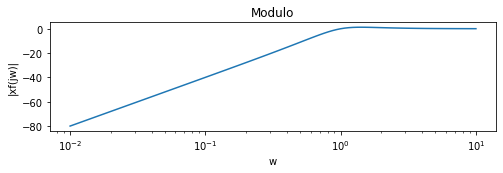

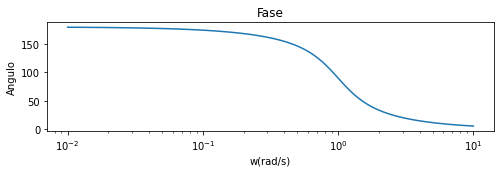

Resposta ao degrau u(t)


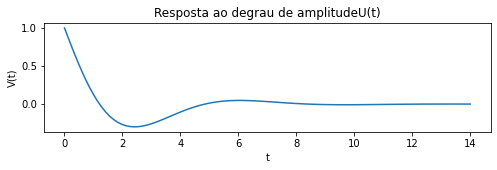

In [5]:
### SEU CÓDIGO COMEÇA AQUI ### (≈ 4 linhas de código)
# parâmetros
R = 1
C = 1
L = 1

### SEU CÓDIGO COMEÇA AQUI ### (≈ 2 linhas de código)
num = [1,0,0]
den = [1,1/(R*C),1/(L*C)]
sys = signal.lti(num,den)
print(sys)

print("Resposta em frequência")
w, xf, phase = signal.bode(sys)
plt.figure(figsize=(8,2))
plt.title("Modulo")
plt.ylabel("|xf(jw)|")
plt.xlabel("w")
plt.xscale ('log')

plt.plot(w,xf)
plt.show()
plt.figure(figsize=(8,2))
plt.title("Fase")
plt.ylabel("Angulo")
plt.xlabel("w(rad/s)")
plt.xscale('log')
plt.plot(w,phase)
plt.show()

t,y=signal.step(sys)# resposta ao degrau do sistema
               # resposta
print("Resposta ao degrau u(t)")
plt.figure(figsize=(8,2))
plt.title("Resposta ao degrau de amplitudeU(t)")
plt.ylabel("V(t)")
plt.xlabel("t")
plt.plot(t,y)
plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**: gráficos com (1) resposta em frequência, diagrama de Bode com magnitude e fase; (2) resposta ao degrau do sistema.
___

## Simulando o sistema

Agora você vai aplicar um sinal aleatório na entrada do sistema $x(t)$ e verificar a sua respectiva resposta $y(t)$. Para isso, faça o seguinte:
 1. Crie um sinal aleatório (distribuição gaussiana) usando a função `np.random.normal(loc=valormedio, scale=desviopadrao, size=numeropontos)`. Faça o sinal aleatório com média nula, desvio padrão unitário e um número suficiente de pontos de modo a ter uma boa visualização do espectro. Nomeie esse sinal como `xa`.
 2. Aplique o sinal `xa` no sistema (circuito RLC), com condições iniciais nulas, e colete a respectiva saída `ya`. Para isso, use a função `signal.lsim` (consulte [esse link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html#scipy.signal.lsim)).
 3. Plote, num mesmo gráfico, o módulo de `xa` e o módulo de `ya` (não precisa plotar a fase!). Ajuste as escalas e eixos (frquências em Hz) de modo a ficar claro a modificação que o sistema fez no sinal de entrada para produzir a saída.
 4. Faça um gráfico como o anterior (FFT de `xa` e `ya`), mas com as amplitudes em dB e escala logaritmica das frequências (em Hz).

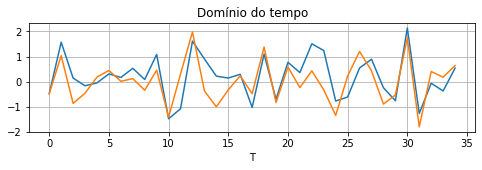

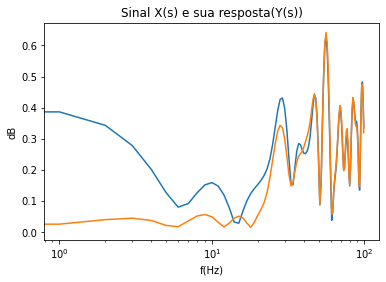

In [6]:
### SEU CÓDIGO COMEÇA AQUI ###
periodo=1
tamanhoVetor=35
x=np.random.normal(0,1, tamanhoVetor)
t=np.linspace(0,periodo*tamanhoVetor-periodo,tamanhoVetor)
Tout,Yout,Xout=signal.lsim(sys, x,t)

plt.figure(figsize=(8,2))
plt.title("Domínio do tempo")
plt.grid()
plt.xlabel("T")
plt.plot(t,x)
plt.plot(Tout,Yout)
plt.show();




Nfft = 200



X_f = fft(x, Nfft)
X_f = X_f/tamanhoVetor
X_f[1:] = 2*X_f[1:]
X_f = X_f[:Nfft//2]

f0 = 1/(periodo*periodo)
freqs = np.arange(0.,Nfft*f0,f0)
freqs = freqs[:Nfft//2]
plt.xscale('log')
plt.title("Sinal X(s) e sua resposta(Y(s))");
plt.xlabel("f(Hz)")
plt.ylabel("dB")
plt.plot(freqs,np.abs(X_f))
Y_f = fft(Yout, Nfft)
Y_f = Y_f/tamanhoVetor
Y_f[1:] = 2*Y_f[1:]
Y_f = Y_f[:Nfft//2]

plt.plot(freqs,np.abs(Y_f))


### FIM DO CÓDIGO ###

**Saída esperada**
Dois gráficos: (1) módulo de `xa` e `ya`, mostrando claramente as frequências alteradas pelo sistema, com frequências em Hz; (2) módulo de `xa` e `ya`, com frequências em Hz, amplitudes em dB e escala de frequências logaritmica.
___

# Conclusões

Escreva as conclusões deste trabalho, respondendo as seguintes perguntas:
1. O sinal aleatório criado, ocupa quais bandas de frequências? Por que?
1. O circuito RLC implementado é um filtro de qual tipo? Justifique mencionando os gráficos apresentados.
1. Escreva uma ou duas frases para fechar esse trabalho.

O filtro do circuito numero 2 mostrou-se com caracteristicas de um filtro passa altas, pois, através do ultimo gráfico, foi possível perceber claramente que nas baixas frequências o sinal de entrada aleatório foi atenuado, enquanto nas altas frequências ele foi mantido.


Bom trabalho :c)

In [10]:
4

4